<a href="https://colab.research.google.com/github/nadya-az/artificial_neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1

In [62]:
from imutils import paths
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, UpSampling2D, Input
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.datasets import cifar100
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, gray2rgb, rgb2gray
from skimage.transform import resize
from skimage.io import imsave
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import cv2
import os

#imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/imagenet-mini")))

In [70]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16() # Импортируем предобученную модель VGG16 с параметрами по умолчанию
newmodel = Sequential() # Создаём пустую модель

for i, layer in enumerate(vggmodel.layers): # Заполняем пустую модель слоями из предобученной модели VGG16 
    if i<19:          # Только до 19-го слоя, чтобы включить только слои, используемые для извлечения признаков
      newmodel.add(layer)

newmodel.summary()

553467096/553467096 [==============================] - 15s 0us/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                    

In [71]:
for layer in newmodel.layers:
    layer.trainable = False

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
path = '/content/drive/MyDrive/cats'

train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(224, 224), batch_size=100, class_mode=None)

print(train)

Found 105 images belonging to 1 classes.


In [74]:
print(train[0].shape)

(100, 224, 224, 3)


In [75]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) # Значения A и B находятся в диапазоне от -127 до 128, 
      # поэтому мы делим значения на 128, чтобы ограничить значения от -1 до 1.
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #размерности должны быть одинаковыми для X и Y
print(X.shape)
print(Y.shape)
print(train[0].shape)

(100, 224, 224, 1)
(100, 224, 224, 2)
(100, 224, 224, 3)


In [77]:
vvggfeatures = []
for i, sample in enumerate(X):
  sample = gray2rgb(sample)
  sample = sample.reshape((1,224,224,3))
  sample = keras.applications.vgg16.preprocess_input(sample)
  prediction = newmodel.predict(sample)
  prediction = prediction.reshape((7,7,512))
  vvggfeatures.append(prediction)
vggfeatures = np.array(vvggfeatures)
print(vggfeatures.shape)

1/1 [==============================] - 0s 22ms/step
(100, 7, 7, 512)


In [ ]:
# vggfeatures_val = []

# for i, sample_val in enumerate(X):
#   sample_val = gray2rgb(sample_val)
#   sample_val = sample_val.reshape((1,224,224,3))
#   sample_val = keras.applications.vgg19.preprocess_input(sample_val)
#   prediction_val = newmodel.predict(sample_val)
#   prediction_val = prediction_val.reshape((14,14,512))
#   vggfeatures_val.append(prediction_val)
#   print(i)
# vggfeatures_val = np.array(vggfeatures_val)
# print(vggfeatures_val.shape)


In [87]:
model = Sequential()

model.add(Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(7,7,512)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.summary()


model.compile(optimizer='Adam', loss='mse' , metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 7, 7, 256)         1179904   
                                                                 
 conv2d_37 (Conv2D)          (None, 7, 7, 128)         295040    
                                                                 
 up_sampling2d_30 (UpSamplin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 up_sampling2d_31 (UpSamplin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 28, 28, 32)      

In [88]:
model.fit(vggfeatures, Y, verbose=1, epochs=1000, batch_size=50)

model.save('/content/colorize_autoencoder_VGG19.h5')

Epoch 1/1000
2/2 [==============================] - 3s 44ms/step - loss: 0.7025 - accuracy: 0.5347
Epoch 2/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.7915 - accuracy: 0.3531
Epoch 3/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.7946 - accuracy: 0.3426
Epoch 4/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.7256 - accuracy: 0.3915
Epoch 5/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.4332 - accuracy: 0.4732
Epoch 6/1000
2/2 [==============================] - 0s 36ms/step - loss: 0.4627 - accuracy: 0.6703
Epoch 7/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.1921 - accuracy: 0.5266
Epoch 8/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.0691 - accuracy: 0.4550
Epoch 9/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.0357 - accuracy: 0.6466
Epoch 10/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.0152 - accuracy: 0.5944
Epoch 11/

In [89]:
model = tf.keras.models.load_model('/content/colorize_autoencoder_VGG19.h5',
                                   custom_objects=None,
                                   compile=True)

In [90]:
testpath = '/content/drive/MyDrive/cats/cats100/'
def image(a):
  files = os.listdir(testpath)
  for idx, file in enumerate(files):

  # Нормализация

    test = img_to_array(load_img(testpath+file))
    #orig = test.copy()

    test = resize(test, (224,224), anti_aliasing=True)
    test*= 1.0/255
    lab = rgb2lab(test)
    l = lab[:,:,0]
    L = gray2rgb(l)
    L = L.reshape((1,224,224,3))
    L = keras.applications.vgg16.preprocess_input(L)
    print(L.shape)

    #предсказание
    vggpred = newmodel.predict(L)
    ab = model.predict(vggpred)
    print(ab.shape)

    # Формирование выходного изображения
    ab = ab*128
    cur = np.zeros((224, 224, 3))
    cur[:,:,0] = l
    cur[:,:,1:] = ab

    # Сохранение выходного изображения
    imsave('/content/'+str(idx)+".jpg", lab2rgb(cur))

image(testpath) 

(1, 224, 224, 3)
1/1 [==============================] - 0s 88ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 23ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 25ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 42 pixels
  return func(*args, **kwargs)


(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step
(1, 224, 224, 2)


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 9 pixels
  return func(*args, **kwargs)


(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 31ms/step
(1, 224, 224, 2)


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return func(*args, **kwargs)


(1, 224, 224, 3)
1/1 [==============================] - 0s 30ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 30ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step
(1, 224, 224, 2)


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return func(*args, **kwargs)


(1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 30ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 30ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 32ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 30ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 28ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 5 pixels
  return func(*args, **kwargs)


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 32ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 23ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 23ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 118 pixels
  return func(*args, **kwargs)


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 31ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 17ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 23ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 21ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step


(1, 224, 224, 2)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 32 pixels
  return func(*args, **kwargs)


(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
(1, 224, 224, 2)


(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step
(1, 224, 224, 2)


In [91]:
import os
from PIL import Image

cats_folder = '/content/drive/MyDrive/cats/cats100'
cats_folder2 = '/content/drive/MyDrive/dogs'

new_folder = '/content/CB'
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

num_images = 100
num_images2 = 5

count = 0
count2 = 0
for filename in os.listdir(cats_folder):
    if filename.endswith('.jpg') and count < num_images:
        image_path = os.path.join(cats_folder, filename)
        new_filename = f'CB{count+1}.jpg'
        new_image_path = os.path.join(new_folder, new_filename)
        with Image.open(image_path).convert('L') as im:
            im_resized = im.resize((224, 224))
            im_resized.save(new_image_path)
        count += 1
else:
  for filename in os.listdir(cats_folder2):
      if filename.endswith('.jpg') and count2 < num_images2:
          image_path2 = os.path.join(cats_folder2, filename)
          new_filename = f'CB{count2+1000}.jpg'
          new_image_path = os.path.join(new_folder, new_filename)
          with Image.open(image_path2).convert('L') as im:
              im_resized = im.resize((224, 224))
              im_resized.save(new_image_path)
          count2 += 1


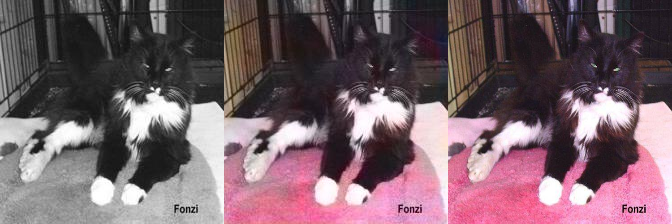

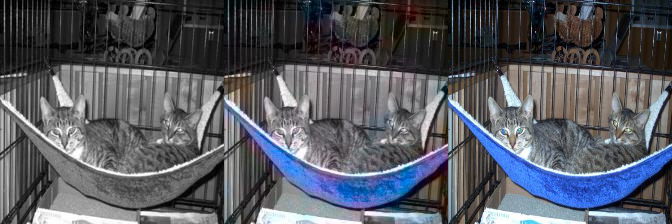

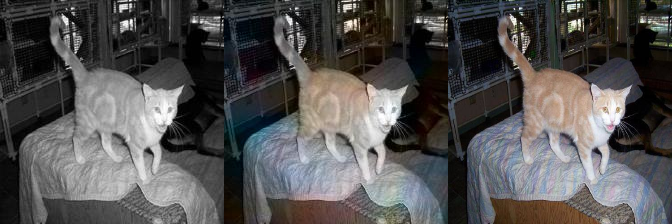

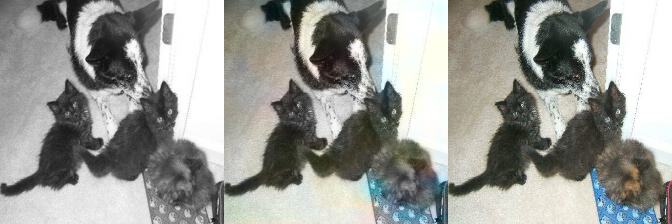

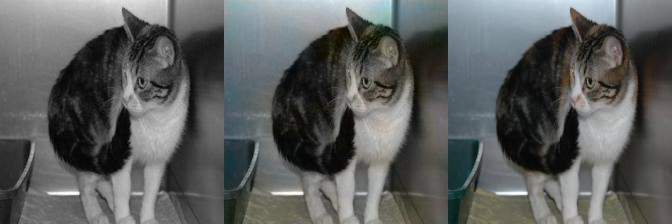

In [93]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

imo_1 = cv2.imread("/content/CB/CB11.jpg")
im_1 = cv2.imread("/content/10.jpg")
img_1 = cv2.imread('/content/drive/MyDrive/cats/cats100/cat.4010.jpg')
img_1 = cv2.resize(img_1, (224, 224))

imo_2 = cv2.imread("/content/CB/CB12.jpg")
im_2 = cv2.imread("/content/11.jpg")
img_2 = cv2.imread('/content/drive/MyDrive/cats/cats100/cat.4015.jpg')
img_2 = cv2.resize(img_2, (224, 224))

imo_3 = cv2.imread("/content/CB/CB16.jpg")
im_3 = cv2.imread("/content/15.jpg")
img_3 = cv2.imread('/content/drive/MyDrive/cats/cats100/cat.4033.jpg')
img_3 = cv2.resize(img_3, (224, 224))

imo_4 = cv2.imread("/content/CB/CB68.jpg")
im_4 = cv2.imread("/content/67.jpg")
img_4 = cv2.imread('/content/drive/MyDrive/cats/cats100/cat.4104.jpg')
img_4 = cv2.resize(img_4, (224, 224))

imo_5 = cv2.imread("/content/CB/CB76.jpg")
im_5 = cv2.imread("/content/75.jpg")
img_5 = cv2.imread('/content/drive/MyDrive/cats/cats100/cat.4091.jpg')
img_5 = cv2.resize(img_5, (224, 224))

# imo_1 = cv2.resize(imo_1, (im_1.shape[1], im_1.shape[0]))
# imo_2 = cv2.resize(imo_2, (im_2.shape[1], im_2.shape[0]))
# imo_3 = cv2.resize(imo_3, (im_3.shape[1], im_3.shape[0]))

pred_1 = np.concatenate((imo_1, im_1, img_1), axis=1)
pred_2 = np.concatenate((imo_2, im_2, img_2), axis=1)
pred_3 = np.concatenate((imo_3, im_3, img_3), axis=1)
pred_4 = np.concatenate((imo_4, im_4, img_4), axis=1)
pred_5 = np.concatenate((imo_5, im_5, img_5), axis=1)

cv2_imshow(pred_1)
cv2_imshow(pred_2)
cv2_imshow(pred_3)
cv2_imshow(pred_4)
cv2_imshow(pred_5)

Задание 2

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from imutils import paths


def preprocess(array):
    """
    Нормализует предоставленный массив и преобразует его в соответствующий формат.

    """
    array = np.array(array, dtype=np.float32)
    array = array / 255.0
    array = np.reshape(array, (len(array), 32, 32, 3))
    return array


def noise(array):
    """
    Добавляет случайный шум к каждому изображению в предоставленном массиве.

    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Отображает десять случайных изображений из каждого из предоставленных массивов.
    """

    n = 8

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(32, 32, 3))
        # plt.show()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(32, 32, 3))
        # plt.show()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
from pathlib import Path

imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/NighttimeDrivingTest/leftImg8bit/test/night")))
data = []

for imagePath in imagePaths:
  image = cv2.imread(imagePath) # загружаем изображение
  image = cv2.resize(image, (32, 32))
  data.append(image) # добавляем в список

In [ ]:

(train_X, test_X) = train_test_split(data, test_size=0.1, random_state=42)

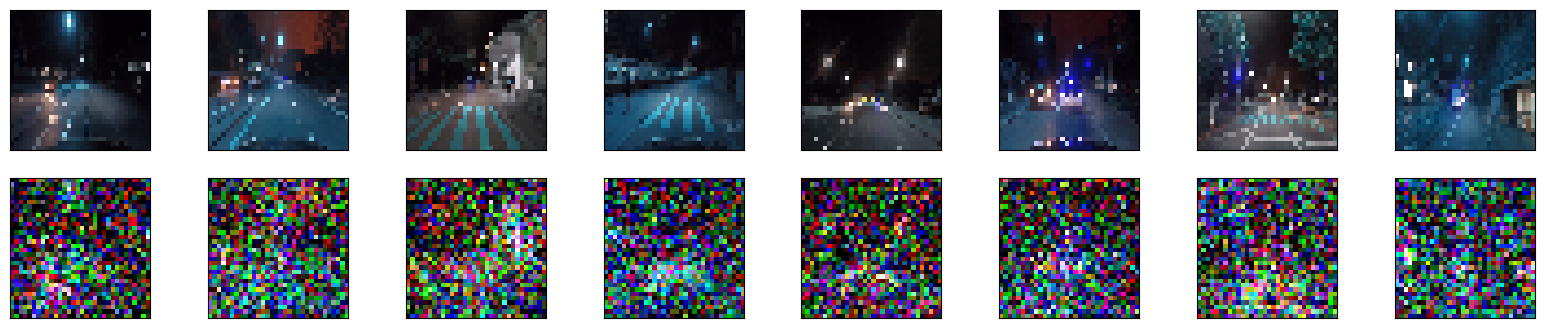

In [ ]:
train_X = preprocess(train_X)
test_X = preprocess(test_X)

noisy_train_X_data = noise(train_X)
noisy_test_X_data = noise(test_X)

display(train_X, noisy_train_X_data)

In [ ]:
train_X.shape

(45, 32, 32, 3)

In [ ]:
test_X.shape

(5, 32, 32, 3)

In [ ]:
noisy_train_X_data.shape

(45, 32, 32, 3)

In [ ]:
noisy_test_X_data.shape

(5, 32, 32, 3)

In [ ]:
input = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same")(x)

x = layers.Conv2D(3, (3, 3), activation="linear", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 16)       9232      
 nspose)                                                         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 3)         435       
                                                                 
Total params: 11,459
Trainable params: 11,459
Non-trainable p

In [ ]:
autoencoder.fit(
    x=train_X,
    y=train_X,
    epochs=150,
    batch_size=100,
    shuffle=True,
    validation_data=(test_X, test_X),
)

Epoch 1/150
1/1 [==============================] - 1s 915ms/step - loss: 0.0561 - val_loss: 0.0384
Epoch 2/150
1/1 [==============================] - 0s 122ms/step - loss: 0.0521 - val_loss: 0.0349
Epoch 3/150
1/1 [==============================] - 0s 120ms/step - loss: 0.0475 - val_loss: 0.0312
Epoch 4/150
1/1 [==============================] - 0s 134ms/step - loss: 0.0424 - val_loss: 0.0272
Epoch 5/150
1/1 [==============================] - 0s 114ms/step - loss: 0.0370 - val_loss: 0.0232
Epoch 6/150
1/1 [==============================] - 0s 117ms/step - loss: 0.0315 - val_loss: 0.0195
Epoch 7/150
1/1 [==============================] - 0s 127ms/step - loss: 0.0261 - val_loss: 0.0165
Epoch 8/150
1/1 [==============================] - 0s 121ms/step - loss: 0.0215 - val_loss: 0.0145
Epoch 9/150
1/1 [==============================] - 0s 126ms/step - loss: 0.0181 - val_loss: 0.0136
Epoch 10/150
1/1 [==============================] - 0s 129ms/step - loss: 0.0160 - val_loss: 0.0136
Epoch 11/

In [ ]:
autoencoder.save('/content/drive/MyDrive/autoencoder.h5')

1/1 [==============================] - 0s 85ms/step


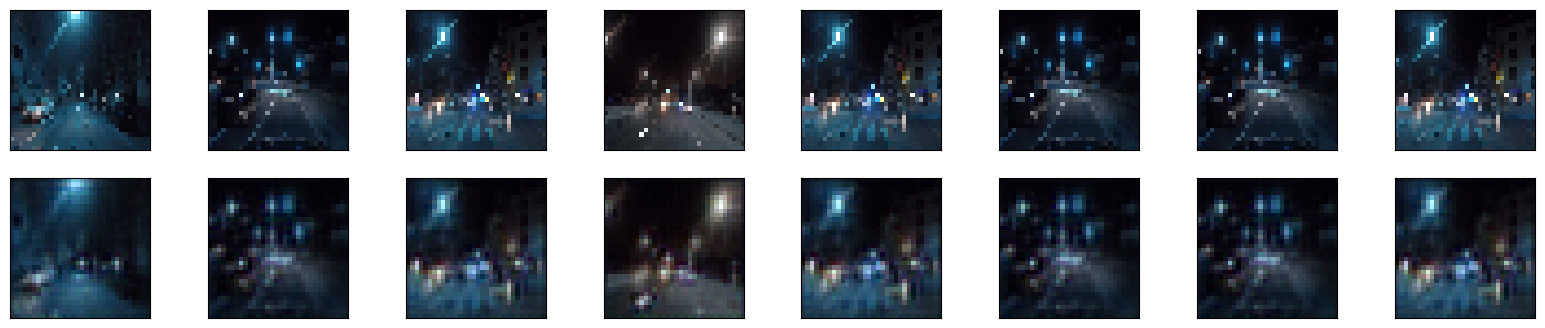

In [ ]:
predictions = autoencoder.predict(test_X)
display(test_X, predictions)

In [ ]:
autoencoder.fit(
    x=noisy_train_X_data,
    y=train_X,
    epochs=100,
    batch_size=100,
    shuffle=True,
    validation_data=(noisy_test_X_data, test_X),
)

Epoch 1/100
1/1 [==============================] - 0s 183ms/step - loss: 0.0288 - val_loss: 0.0187
Epoch 2/100
1/1 [==============================] - 0s 143ms/step - loss: 0.0193 - val_loss: 0.0166
Epoch 3/100
1/1 [==============================] - 0s 123ms/step - loss: 0.0194 - val_loss: 0.0178
Epoch 4/100
1/1 [==============================] - 0s 122ms/step - loss: 0.0219 - val_loss: 0.0179
Epoch 5/100
1/1 [==============================] - 0s 120ms/step - loss: 0.0221 - val_loss: 0.0168
Epoch 6/100
1/1 [==============================] - 0s 116ms/step - loss: 0.0202 - val_loss: 0.0158
Epoch 7/100
1/1 [==============================] - 0s 116ms/step - loss: 0.0182 - val_loss: 0.0157
Epoch 8/100
1/1 [==============================] - 0s 114ms/step - loss: 0.0172 - val_loss: 0.0163
Epoch 9/100
1/1 [==============================] - 0s 118ms/step - loss: 0.0172 - val_loss: 0.0168
Epoch 10/100
1/1 [==============================] - 0s 123ms/step - loss: 0.0174 - val_loss: 0.0165
Epoch 11/

1/1 [==============================] - 0s 26ms/step


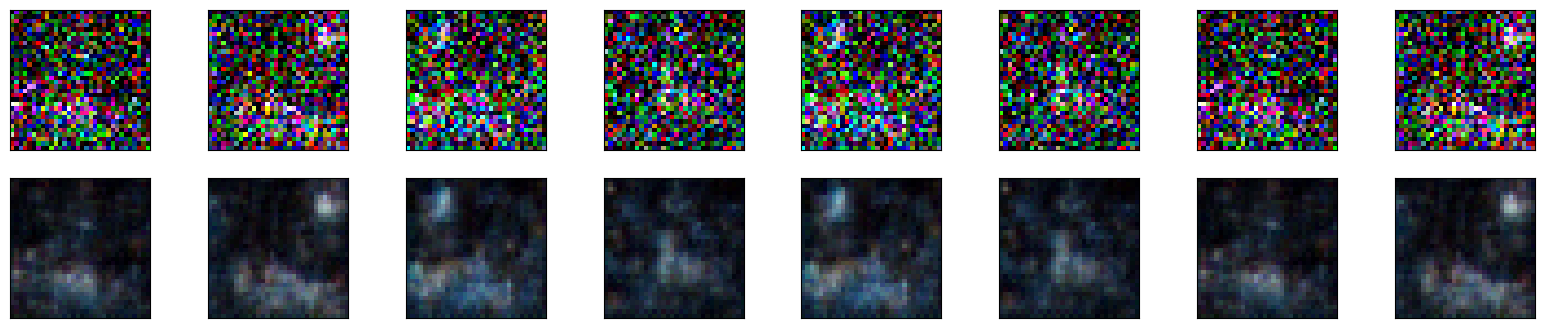

In [ ]:
predictions = autoencoder.predict(noisy_test_X_data)
display(noisy_test_X_data, predictions)

Задание 3

In [ ]:
from imutils import paths
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, UpSampling2D, Input
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, gray2rgb, rgb2gray
from skimage.transform import resize
from skimage.io import imsave
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import cv2
import os

imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/NighttimeDrivingTest/leftImg8bit/test/night")))

In [ ]:
datas1 = []

for imagePath1 in imagePaths:
  image1 = cv2.imread(imagePath1)
  image1 = cv2.resize(image1, (128, 128))
  datas1.append(image1) 

In [ ]:
datas2 = []
for imagePath2 in imagePaths:
  image2 = cv2.imread(imagePath2)
  image2 = cv2.resize(image2, (256, 256))
  datas2.append(image2) 

In [ ]:
datas2[0].shape

(256, 256, 3)

In [ ]:
datas1[0].shape

(128, 128, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(datas1, datas2, test_size=0.2, random_state=42)

In [ ]:
def preprocess1(array1): #Создаем функцию с параметром array1

    array1 = np.array(array1, dtype=np.float32)
    array1 = array1 / 255.0
    array1 = np.reshape(array1, (len(array1), 128, 128, 3))
    return array1

In [ ]:
def preprocess2(array2): #Создаем функцию с параметром array2

    array2 = np.array(array2, dtype=np.float32) # Cоздаем массив
    array2 = array2 / 255.0
    array2 = np.reshape(array2, (len(array2), 256, 256, 3)) #Устанавливаем размер
    return array2

In [ ]:
x_train = preprocess1(x_train)#помещаем
x_test = preprocess1(x_test)
y_train = preprocess2(y_train)
y_test = preprocess2(y_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40, 128, 128, 3)
(40, 256, 256, 3)
(10, 128, 128, 3)
(10, 256, 256, 3)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

input1 = layers.Input(shape=(128, 128, 3))

# Encoder
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(input1)
x = layers.MaxPooling2D((2, 2), padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="linear", padding="same")(x)


auto = Model(input1, x)
auto.compile(optimizer="adam", loss="mse", metrics = ["mse", "accuracy"])
auto.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 128, 128, 16)     18448     
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 256, 256, 32)     4640      
 ranspose)                                                       
                                                           

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40, 128, 128, 3)
(40, 256, 256, 3)
(10, 128, 128, 3)
(10, 256, 256, 3)


In [ ]:
import tensorflow as tf

In [ ]:
history = auto.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=20,
    shuffle=True,
    validation_data = (x_test, y_test),
    )

Epoch 1/5
2/2 [==============================] - 7s 3s/step - loss: 0.0630 - mse: 0.0630 - accuracy: 0.4598 - val_loss: 0.0543 - val_mse: 0.0543 - val_accuracy: 0.4402
Epoch 2/5
2/2 [==============================] - 7s 3s/step - loss: 0.0579 - mse: 0.0579 - accuracy: 0.4551 - val_loss: 0.0503 - val_mse: 0.0503 - val_accuracy: 0.4557
Epoch 3/5
2/2 [==============================] - 7s 3s/step - loss: 0.0533 - mse: 0.0533 - accuracy: 0.4576 - val_loss: 0.0447 - val_mse: 0.0447 - val_accuracy: 0.4497
Epoch 4/5
2/2 [==============================] - 7s 3s/step - loss: 0.0468 - mse: 0.0468 - accuracy: 0.4476 - val_loss: 0.0369 - val_mse: 0.0369 - val_accuracy: 0.4392
Epoch 5/5
2/2 [==============================] - 6s 3s/step - loss: 0.0377 - mse: 0.0377 - accuracy: 0.4406 - val_loss: 0.0270 - val_mse: 0.0270 - val_accuracy: 0.4355


In [ ]:
auto.save('/content/drive/MyDrive/autoencoder2.h5')

In [ ]:
test_img = x_test[0]

test_img = np.reshape(test_img, (1, 128, 128, 3))

In [ ]:
test_pred = auto.predict(test_img)

1/1 [==============================] - 0s 118ms/step


In [ ]:
test_img = test_img[0,]
test_pred = test_pred[0,]

In [ ]:
np.unique(test_pred)

array([-0.05375487, -0.04827011, -0.04310124, ...,  1.5844746 ,
        1.598305  ,  1.607223  ], dtype=float32)

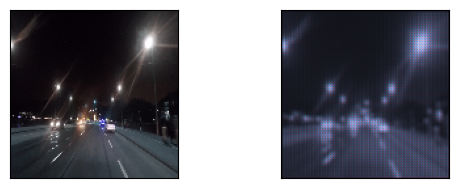

In [ ]:
ax = plt.subplot(2, 2, 1)
plt.imshow(test_img)
        # plt.show()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 2, 2)
plt.imshow(test_pred)
        # plt.show()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()